# The goal of this notebook is to create maps and plots to visualize the Canadian field data.

## importing libraries

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import rasterio 
import numpy
import folium

## showing location

In [2]:
# data are taken from https://zenodo.org/records/6611475
ds = pd.read_csv('./data/ds_canada/2. SOC_Database.csv')

map = folium.Map([43.708, -80.265], zoom_start=4)

folium.Marker(
     location=(ds['Y (DD)'].iloc[0], ds['X (DD)'].iloc[0]),
).add_to(map)

map

## showing distribution of samples

In [11]:
map = folium.Map([43.708, -80.265], zoom_start=15)

for i in ds.index:
    folium.CircleMarker(
        location=(ds['Y (DD)'].iloc[i], ds['X (DD)'].iloc[i]),
        radius=2,
        color="cornflowerblue"
    ).add_to(map)

map

## plotting soil organic carbon, elevation and sample depth

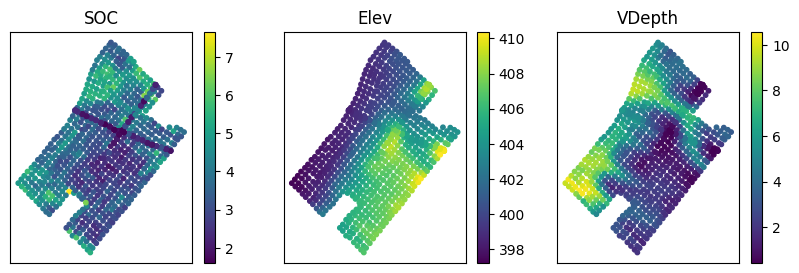

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

size = 10

p = axs[0].scatter(ds['X (DD)'], ds['Y (DD)'], s=size, c=ds['SOC (%)'])
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[0].set_title('SOC')
plt.colorbar(p)

p = axs[1].scatter(ds['X (DD)'], ds['Y (DD)'], s=size, c=ds['Elev'])
axs[1].xaxis.set_visible(False)
axs[1].yaxis.set_visible(False)
axs[1].set_title('Elev')
plt.colorbar(p)

p = axs[2].scatter(ds['X (DD)'], ds['Y (DD)'], s=size, c=ds['VDepth'])
axs[2].xaxis.set_visible(False)
axs[2].yaxis.set_visible(False)
axs[2].set_title('VDepth')
plt.colorbar(p)

## the images of the field are downloaded from sentinel-2 through sentinel-hub package

## plotting NDVI

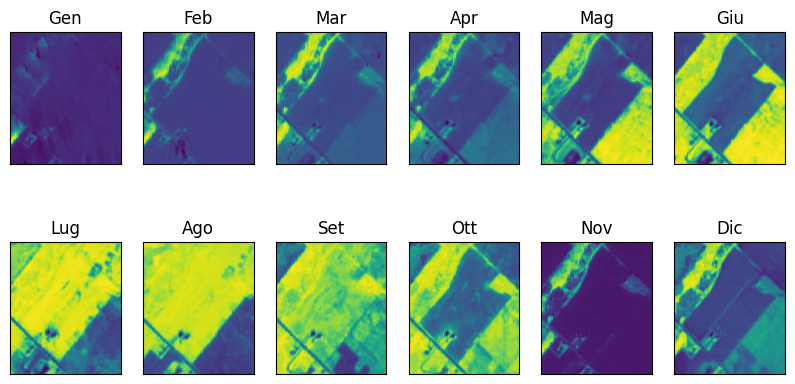

(-0.5, 1992.5, 2377.5, -0.5)

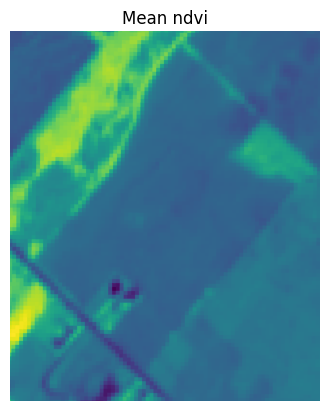

In [5]:
fig, axs = plt.subplots(2, 6, figsize=(10, 5))

mounths = ['Gen', 'Feb', 'Mar', 'Apr', 'Mag', 'Giu', 'Lug', 'Ago', 'Set', 'Ott', 'Nov', 'Dic']

for i in range(len(axs)):
    for j in range(len(axs[i])):
        axs[i][j].set_title(mounths[i*6 + j])

found = False

for name in os.listdir('data/ds_canada/immagini/2018'):

    raster = rasterio.open("data/ds_canada/immagini/2018/" + name + "/response.tiff")

    mounth = int(name.split('-')[1]) - 1

    red = numpy.array(raster.read(4), dtype=numpy.float64) / 10000
    nir = numpy.array(raster.read(8), dtype=numpy.float64) / 10000
    ndvi = (nir - red) / (nir + red)

    if not found:
        mean = ndvi
        found = True
    else:
        mean += ndvi

    axs[mounth // 6, mounth % 6].imshow(ndvi)
    axs[mounth // 6, mounth % 6].xaxis.set_visible(False)
    axs[mounth // 6, mounth % 6].yaxis.set_visible(False)

    raster.close()

mean /= 12

plt.show()

plt.imshow(mean)
plt.title("Mean ndvi")
plt.axis("off")

## plotting EVI

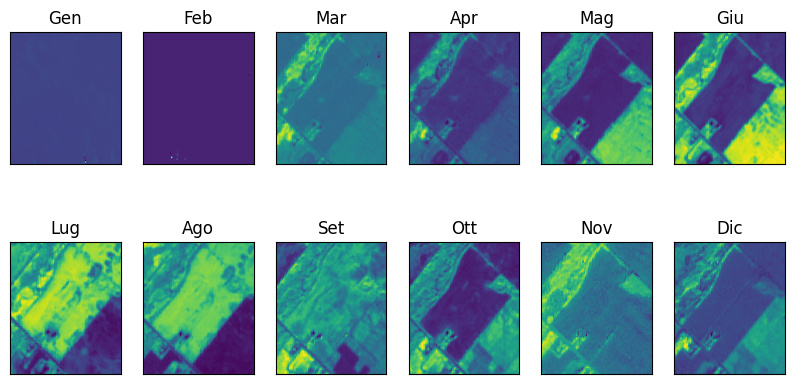

(-0.5, 1992.5, 2377.5, -0.5)

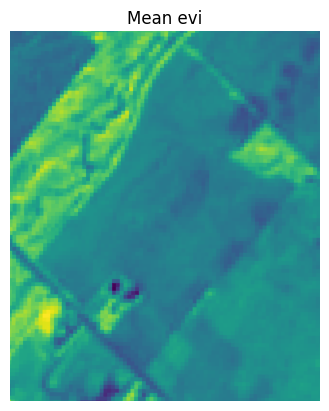

In [6]:
fig, axs = plt.subplots(2, 6, figsize=(10, 5))

mounths = ['Gen', 'Feb', 'Mar', 'Apr', 'Mag', 'Giu', 'Lug', 'Ago', 'Set', 'Ott', 'Nov', 'Dic']

for i in range(len(axs)):
    for j in range(len(axs[i])):
        axs[i][j].set_title(mounths[i*6 + j])

found = False

for name in os.listdir('data/ds_canada/immagini/2018'):

    raster = rasterio.open("data/ds_canada/immagini/2018/" + name + "/response.tiff")

    mounth = int(name.split('-')[1]) - 1

    blue = numpy.array(raster.read(2), dtype=numpy.float64) / 10000
    red = numpy.array(raster.read(4), dtype=numpy.float64) / 10000
    nir = numpy.array(raster.read(8), dtype=numpy.float64) / 10000
    evi = 2.5 * (nir - red) / ((nir + 6.0 * red - 7.5 * blue) + 1.0)

    if mounth > 2:
        if not found:
            mean = evi
            found = True
        else:
            mean += evi

    axs[mounth // 6, mounth % 6].imshow(evi)
    axs[mounth // 6, mounth % 6].xaxis.set_visible(False)
    axs[mounth // 6, mounth % 6].yaxis.set_visible(False)

    raster.close()

mean /= 12

plt.show()

plt.imshow(mean)
plt.title("Mean evi")
plt.axis("off")

## plotting EVI2

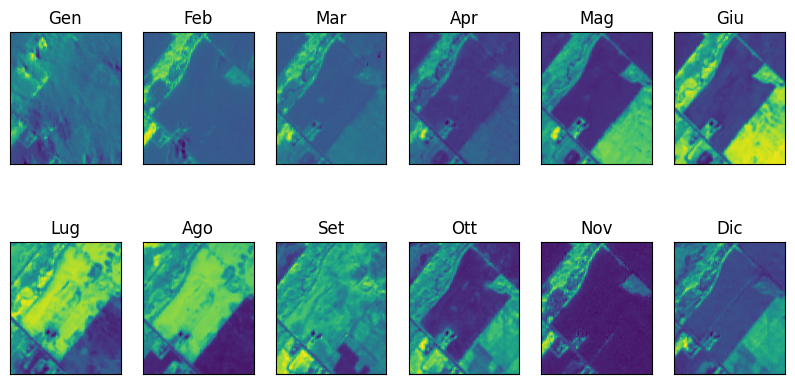

(-0.5, 1992.5, 2377.5, -0.5)

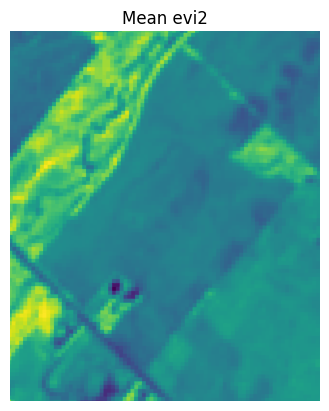

In [7]:
fig, axs = plt.subplots(2, 6, figsize=(10, 5))

mounths = ['Gen', 'Feb', 'Mar', 'Apr', 'Mag', 'Giu', 'Lug', 'Ago', 'Set', 'Ott', 'Nov', 'Dic']

for i in range(len(axs)):
    for j in range(len(axs[i])):
        axs[i][j].set_title(mounths[i*6 + j])

found = False

for name in os.listdir('data/ds_canada/immagini/2018'):

    raster = rasterio.open("data/ds_canada/immagini/2018/" + name + "/response.tiff")

    mounth = int(name.split('-')[1]) - 1

    red = numpy.array(raster.read(4), dtype=numpy.float64) / 10000
    nir = numpy.array(raster.read(8), dtype=numpy.float64) / 10000
    evi2 = 2.4 * (nir - red) / (nir + red + 1.0)

    if not found:
        mean = evi2
        found = True
    else:
        mean += evi2

    axs[mounth // 6, mounth % 6].imshow(evi2)
    axs[mounth // 6, mounth % 6].xaxis.set_visible(False)
    axs[mounth // 6, mounth % 6].yaxis.set_visible(False)

    raster.close()

mean /= 12

plt.show()

plt.imshow(mean)
plt.title("Mean evi2")
plt.axis("off")

## plotting GNDVI

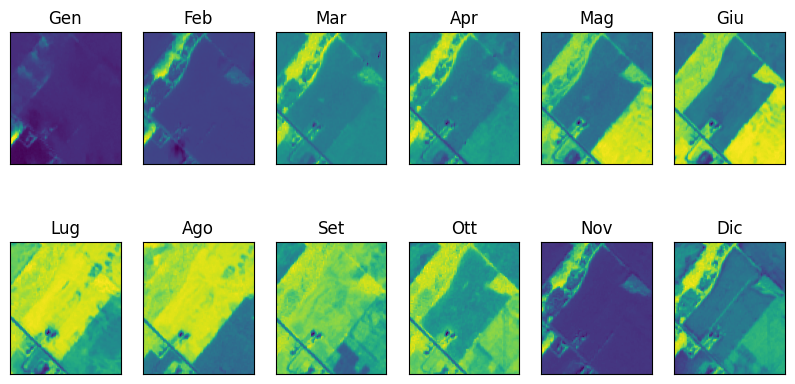

(-0.5, 1992.5, 2377.5, -0.5)

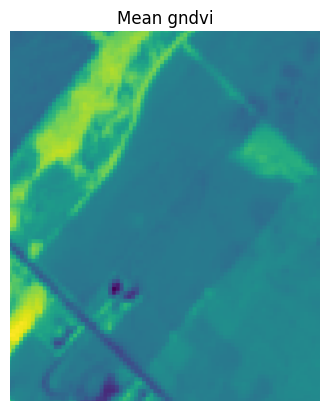

In [8]:
fig, axs = plt.subplots(2, 6, figsize=(10, 5))

mounths = ['Gen', 'Feb', 'Mar', 'Apr', 'Mag', 'Giu', 'Lug', 'Ago', 'Set', 'Ott', 'Nov', 'Dic']

for i in range(len(axs)):
    for j in range(len(axs[i])):
        axs[i][j].set_title(mounths[i*6 + j])

found = False

for name in os.listdir('data/ds_canada/immagini/2018'):

    raster = rasterio.open("./data/ds_canada/immagini/2018/" + name + "/response.tiff")

    mounth = int(name.split('-')[1]) - 1

    green = numpy.array(raster.read(3), dtype=numpy.float64) / 10000
    nir = numpy.array(raster.read(8), dtype=numpy.float64) / 10000
    gndvi = (nir - green) / (nir + green)

    if not found:
        mean = gndvi
        found = True
    else:
        mean += gndvi

    axs[mounth // 6, mounth % 6].imshow(gndvi)
    axs[mounth // 6, mounth % 6].xaxis.set_visible(False)
    axs[mounth // 6, mounth % 6].yaxis.set_visible(False)

    raster.close()

mean /= 12

plt.show()

plt.imshow(mean)
plt.title("Mean gndvi")
plt.axis("off")

## plotting SAVI

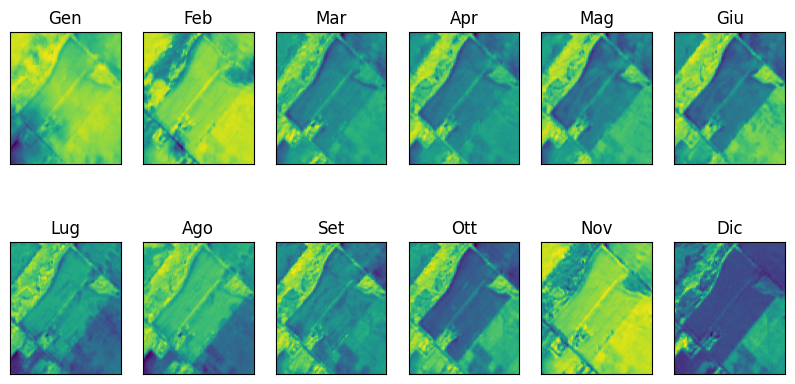

(-0.5, 1992.5, 2377.5, -0.5)

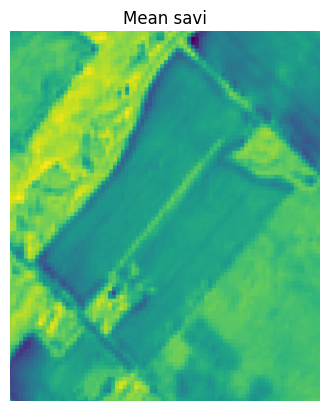

In [9]:
fig, axs = plt.subplots(2, 6, figsize=(10, 5))

mounths = ['Gen', 'Feb', 'Mar', 'Apr', 'Mag', 'Giu', 'Lug', 'Ago', 'Set', 'Ott', 'Nov', 'Dic']

for i in range(len(axs)):
    for j in range(len(axs[i])):
        axs[i][j].set_title(mounths[i*6 + j])

found = False

for name in os.listdir('data/ds_canada/immagini/2018'):

    raster = rasterio.open("./data/ds_canada/immagini/2018/" + name + "/response.tiff")

    mounth = int(name.split('-')[1]) - 1

    gred = numpy.array(raster.read(4), dtype=numpy.float64) / 10000
    nir = numpy.array(raster.read(8), dtype=numpy.float64) / 10000
    savi = (nir - red) / (nir + red + 0.428) * (1.0 + 0.428)

    if not found:
        mean = savi
        found = True
    else:
        mean += savi

    axs[mounth // 6, mounth % 6].imshow(savi)
    axs[mounth // 6, mounth % 6].xaxis.set_visible(False)
    axs[mounth // 6, mounth % 6].yaxis.set_visible(False)

    raster.close()

mean /= 12

plt.show()

plt.imshow(mean)
plt.title("Mean savi")
plt.axis("off")

## plotting NDWI

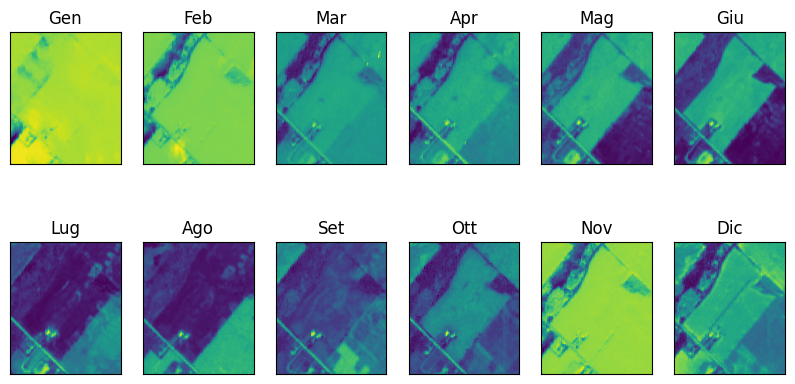

(-0.5, 1992.5, 2377.5, -0.5)

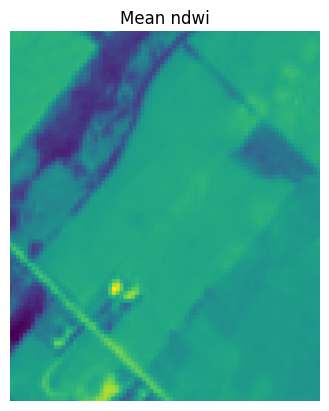

In [10]:
fig, axs = plt.subplots(2, 6, figsize=(10, 5))

mounths = ['Gen', 'Feb', 'Mar', 'Apr', 'Mag', 'Giu', 'Lug', 'Ago', 'Set', 'Ott', 'Nov', 'Dic']

for i in range(len(axs)):
    for j in range(len(axs[i])):
        axs[i][j].set_title(mounths[i*6 + j])

found = False

for name in os.listdir('data/ds_canada/immagini/2018'):

    raster = rasterio.open("./data/ds_canada/immagini/2018/" + name + "/response.tiff")

    mounth = int(name.split('-')[1]) - 1

    green = numpy.array(raster.read(3), dtype=numpy.float64) / 10000
    nir = numpy.array(raster.read(8), dtype=numpy.float64) / 10000
    ndwi = (green - nir) / (green + nir)

    if not found:
        mean = ndwi
        found = True
    else:
        mean += ndwi

    axs[mounth // 6, mounth % 6].imshow(ndwi)
    axs[mounth // 6, mounth % 6].xaxis.set_visible(False)
    axs[mounth // 6, mounth % 6].yaxis.set_visible(False)

    raster.close()

mean /= 12

plt.show()

plt.imshow(mean)
plt.title("Mean ndwi")
plt.axis("off")